In [143]:
import numpy as np
import sympy as sp
import random
from typing import Callable, Tuple
import matplotlib.pyplot as plt

Перед застосуванням градієнтного спуску оголосимо функцію $E$ та її градієнт

In [144]:
w1, w2 = sp.symbols('w1 w2')
sigma, a, b = sp.symbols('sigma a b')
R11, R12, R21, R22 = sp.symbols('R11 R12 R21 R22')

R = sp.Matrix([[R11, R12], [R21, R22]])
w_vec = sp.Matrix([w1, w2])
quadratic_form = (w_vec.T * R * w_vec)[0, 0]

E_expr = 1/2 * sigma ** 2 - (a * w1 + b * w2) + 1/2 * quadratic_form
derivative_w1 = sp.diff(E_expr, w1)
derivative_w2 = sp.diff(E_expr, w2)

gradE = sp.lambdify((w1, w2, sigma, a, b, R11, R12, R21, R22), [derivative_w1, derivative_w2], 'numpy')

In [145]:
sigma = np.random.rand(); a = 0.9; b = 0.2; c = 0.6; R = np.matrix([[1, c], [c, 1]]); eta = 0.4; precision = 1e-3

E = lambda w: 1 / 2 * sigma ** 2 - np.array([a,b]) @ w + 1 / 2 * np.transpose(w) @ R @ w
print(f'E = 1 / 2 * {sigma} ** 2 - {np.array([a, b])} * w + 1 / 2 * wT * {R} * w')

E = 1 / 2 * 0.7261853457518834 ** 2 - [0.9 0.2] * w + 1 / 2 * wT * [[1.  0.6]
 [0.6 1. ]] * w


Тепер можна запускати алгоритм градієнтного спуску. Умова зупинки - $\|w(k) - w(k+1)\|<0.001$

In [146]:
def gradient_descent(
        E: Callable[[np.ndarray], np.ndarray],
        gradE: Callable[[float, float, float, float, float, float, float, float, float], Tuple[float, float]],
        precision: float,
        eta: float,
        maxsteps=500
    ) -> (np.ndarray, bool):
    i = 0 # Номер ітерації
    w_i = [] # Список точок для побудови траекторій
    w = np.array([random.uniform(-10, 10), random.uniform(-10, 10)]) # Обираємо початкову точку випадково
    print(f'starting target function value = {E(w)}\n')
    eps = 1 # Змінна, що відслідковує норму різниці w(k) і w(k-1)

    while eps >= precision:
        if i >= maxsteps: # Якщо досягнено заданої кількості кроків - зупинити виконання
            return w_i
        i += 1
        print(f'iteration = {i}')
        grad = gradE(*w, sigma, a, b, R[0, 0], R[0, 1], R[1, 0], R[1, 1]) # Обчислення градієнту в поточній точці
        print(f'gradient of E in {w} = {grad}')
        w_new = w - eta * np.array(grad) # Оновлення точки
        print(f'updated w:  w = {w_new}')
        eps = np.linalg.norm(w - w_new)
        print(f'E(w) = {E(w_new)}')
        print(f'eps = {eps}\n')
        w = w_new

        w_i.append(w) # Додаємо стару точку до списку

    return w_i


descent_trajectory = gradient_descent(E, gradE, precision, eta)

starting target function value = [[30.20332143]]

iteration = 1
gradient of E in [-2.71043715 -5.31441522] = [np.float64(-6.79908627876157), np.float64(-7.140677506286313)]
updated w:  w = [ 0.00919736 -2.45814421]
E(w) = [[3.75473751]]
eps = 3.9439442080197264

iteration = 2
gradient of E in [ 0.00919736 -2.45814421] = [np.float64(-2.3656891657482273), np.float64(-2.652625796869011)]
updated w:  w = [ 0.95547303 -1.3970939 ]
E(w) = [[0.31463434]]
eps = 1.4217121422934251

iteration = 3
gradient of E in [ 0.95547303 -1.3970939 ] = [np.float64(-0.7827833082003739), np.float64(-1.0238100783418316)]
updated w:  w = [ 1.26858635 -0.98756986]
E(w) = [[-0.13992897]]
eps = 0.5155093456551769

iteration = 4
gradient of E in [ 1.26858635 -0.98756986] = [np.float64(-0.22395556611818457), np.float64(-0.42641805303700925)]
updated w:  w = [ 1.35816858 -0.81700264]
E(w) = [[-0.2049974]]
eps = 0.19266071796863637

iteration = 5
gradient of E in [ 1.35816858 -0.81700264] = [np.float64(-0.032033006942

Алгоритм збігся, не досягши максимальної кількості ітерацій.

Створюємо функцію для зображення траекторій вектору w протягом роботи алгоритму

In [162]:
def plot_descent(w_i: np.ndarray, f: Callable[[np.ndarray], np.ndarray]) -> None:
    x_i = np.array([w[0] for w in w_i])
    y_i = np.array([w[1] for w in w_i])
    z_i = np.array([f(w).item() for w in w_i])

    fig = plt.figure(figsize=(14, 8))
    fig.suptitle('Gradient Descent')

    ax = fig.add_subplot(2, 1, 1)

    ax.plot(x_i, y_i)
    ax.scatter(x_i[0], y_i[0], color='green', s=20, label='Початок')
    if z_i[-1] == z_i.min():
        ax.scatter(x_i[-1], y_i[-1], color='red', s=20, label='Мінімум')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Trajectory of w(t) in W')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')

    ax = fig.add_subplot(2, 1, 2, projection='3d')

    # Адаптивні межі графіку
    margin = abs(x_i.min() - x_i.max()) * 0.1
    x_min, x_max = x_i.min() - margin, x_i.max() + margin
    margin = abs(y_i.min() - y_i.max()) * 0.1
    y_min, y_max = y_i.min() - margin, y_i.max() + margin

    x_vals = np.linspace(x_min, x_max, 50)
    y_vals = np.linspace(y_min, y_max, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    X_flat = X.flatten()
    Y_flat = Y.flatten()
    points = np.column_stack((X_flat, Y_flat))
    Z_flat = np.array([f(point) for point in points])

    Z = Z_flat.reshape(X.shape)

    z_min, z_max = Z.min(), Z.max()
    z_range = z_max - z_min
    ax.set_zlim(z_min - 0.005 * z_range, z_max + 0.005 * z_range)

    surf = ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', linewidth=0)

    ax.plot(x_i, y_i, z_i, 'r-', linewidth=3, markersize=4, label='Траєкторія')
    ax.scatter(x_i[0], y_i[0], z_i[0], color='green', s=20, label='Початок')
    if z_i[-1] == z_i.min():
        ax.scatter(x_i[-1], y_i[-1], z_i[-1], color='red', s=20, label='Мінімум')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('E')
    ax.set_title('Trajectory of w(t) in 3D space')
    ax.legend(loc='upper right')

    plt.show()

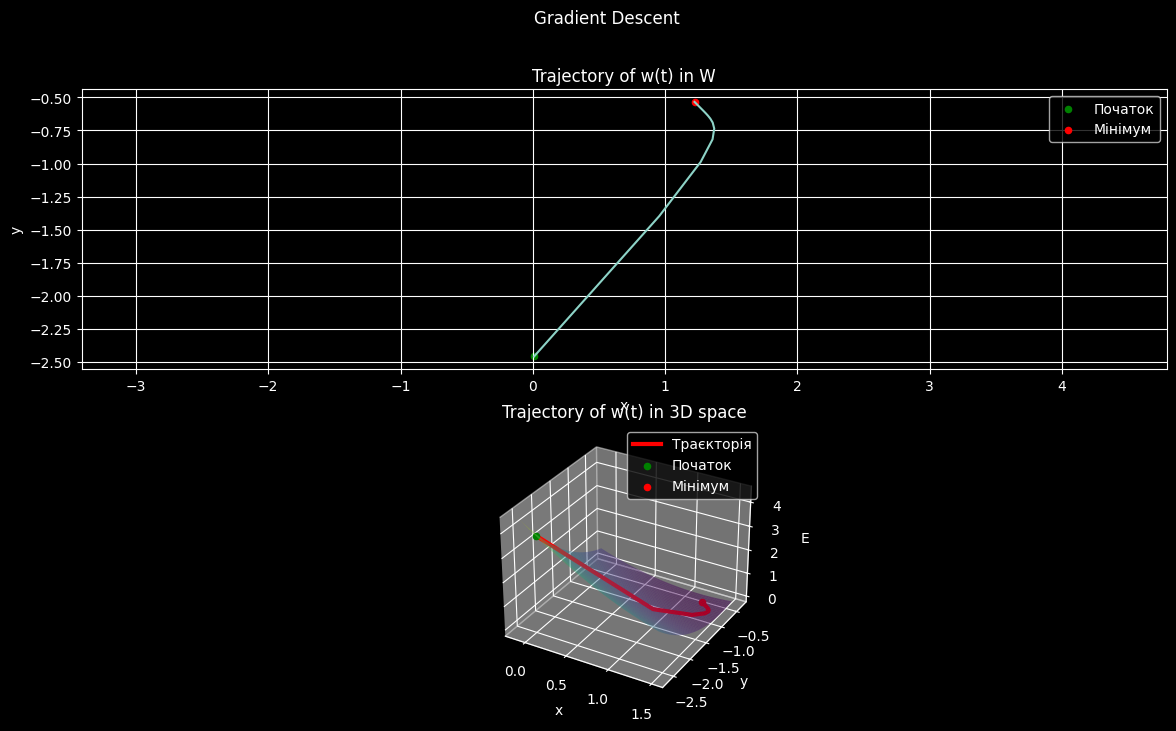

In [163]:
plot_descent(descent_trajectory, E)

Знайдемо точне значення $w^*$ за допомогою нормального рівняння $w^*=R^{-1}p$

In [149]:
rho = np.array([a,b])
R_I = np.linalg.inv(R)

w_opt = R_I @ rho
w_opt

matrix([[ 1.21875, -0.53125]])

Порівняємо зі знайденим за допомогою градієнтного спуску мінімумом

In [150]:
print(f'Чисельно знайдена точка мінімуму: {descent_trajectory[-1]}')
print(f'Вектор різниці між точкою w* і знайденою точкою мінімуму: {w_opt - descent_trajectory[-1]}')
print(f'Норма вектора різниці: {np.linalg.norm(w_opt - descent_trajectory[-1])}')

Чисельно знайдена точка мінімуму: [ 1.2219877 -0.5344877]
Вектор різниці між точкою w* і знайденою точкою мінімуму: [[-0.0032377  0.0032377]]
Норма вектора різниці: 0.004578800583864315


Обчислимо власні числа матриці автокореляцій R

In [153]:
lambdas = np.linalg.eigvals(R)
lambda_max = max(lambdas)
lambda_min = min(lambdas)

In [154]:
print(f'Алгоритм має збігатися при 0 < eta < {2 / lambda_max}')

Алгоритм має збігатися при 0 < eta < 1.25


In [155]:
eta = 2/lambda_max*0.95
conv_desc = gradient_descent(E, gradE, precision, eta)

starting target function value = [[18.68250805]]

iteration = 1
gradient of E in [ 7.92251449 -7.56455545] = [np.float64(2.4837812241947494), np.float64(-3.0110467542408443)]
updated w:  w = [ 4.97302429 -3.98893743]
E(w) = [[5.00478477]]
eps = 4.635141496392792

iteration = 2
gradient of E in [ 4.97302429 -3.98893743] = [np.float64(1.6796618328600856), np.float64(-1.2051228558186005)]
updated w:  w = [ 2.97842586 -2.55785404]
E(w) = [[1.23045189]]
eps = 2.4548772995593993

iteration = 3
gradient of E in [ 2.97842586 -2.55785404] = [np.float64(0.5437134411094872), np.float64(-0.9707985204468232)]
updated w:  w = [ 2.33276615 -1.4050308 ]
E(w) = [[0.18657896]]
eps = 1.321316726788174

iteration = 4
gradient of E in [ 2.33276615 -1.4050308 ] = [np.float64(0.5897476756103325), np.float64(-0.20537110420673038)]
updated w:  w = [ 1.63244079 -1.16115261]
E(w) = [[-0.10403218]]
eps = 0.7415741273067809

iteration = 5
gradient of E in [ 1.63244079 -1.16115261] = [np.float64(0.03574922257035784

In [156]:
print('eta:', eta)
print(f'Норма відстані до w*: {np.linalg.norm(conv_desc[-1] - w_opt)}')

eta: 1.1875
Норма відстані до w*: 0.0004652672210134293


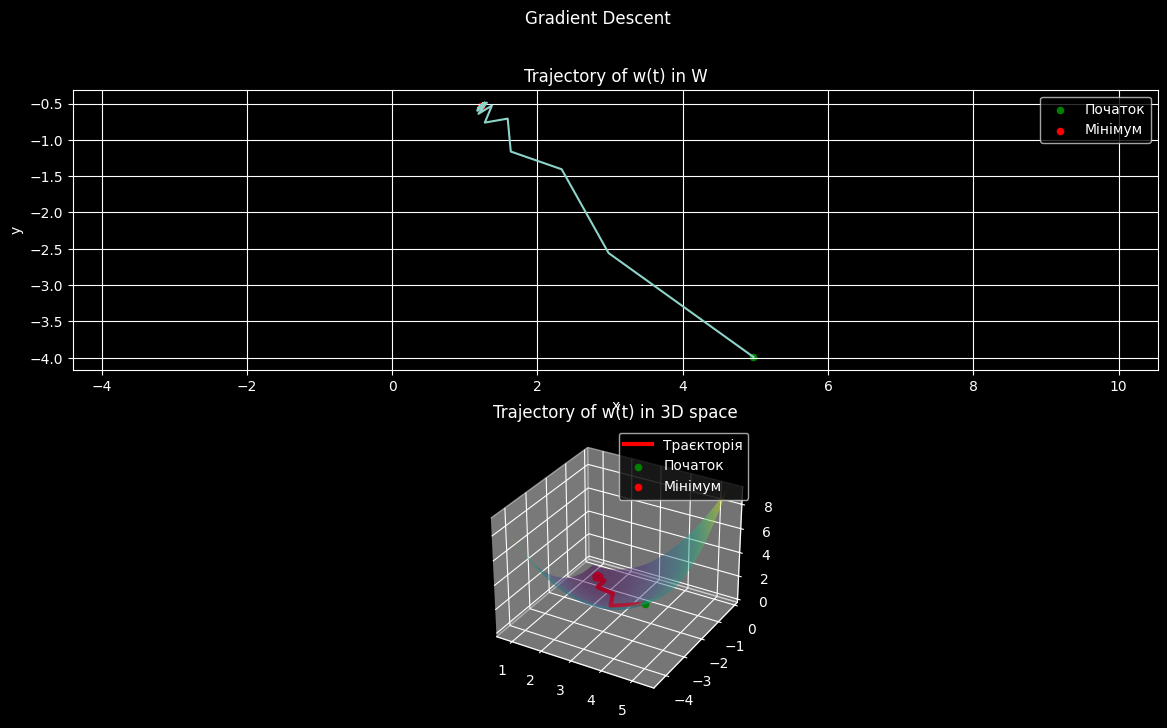

In [157]:
plot_descent(conv_desc, E)

Отже, при $\eta < 1.25$ алгоритм градієнтного спуску дійсно збігається

In [158]:
eta = 2/lambda_max/0.95
div_desc = gradient_descent(E, gradE, precision, eta)

starting target function value = [[116.35636998]]

iteration = 1
gradient of E in [-7.4472665  -8.93723163] = [np.float64(-13.709605480966255), np.float64(-13.605591530265372)]
updated w:  w = [10.59168808  8.96486249]
E(w) = [[142.18630499]]
eps = 25.41434351275875

iteration = 2
gradient of E in [10.59168808  8.96486249] = [np.float64(15.070605570514637), np.float64(15.11987533663611)]
updated w:  w = [ -9.2380561  -10.92971032]
E(w) = [[173.74555542]]
eps = 28.089371321958904

iteration = 3
gradient of E in [ -9.2380561  -10.92971032] = [np.float64(-16.69588228803313), np.float64(-16.672543977765066)]
updated w:  w = [12.73021007 11.00784755]
E(w) = [[212.29971906]]
eps = 31.046113501528772

iteration = 4
gradient of E in [12.73021007 11.00784755] = [np.float64(18.434918599719726), np.float64(18.44597358879407)]
updated w:  w = [-11.52626177 -13.26317033]
E(w) = [[259.39800499]]
eps = 34.314118597741306

iteration = 5
gradient of E in [-11.52626177 -13.26317033] = [np.float64(-20.38

In [159]:
print('eta:', eta)
print(f'Норма відстані до w*: {np.linalg.norm(div_desc[-1] - w_opt)}')

eta: 1.3157894736842106
Норма відстані до w*: 6.525536861730337e+22


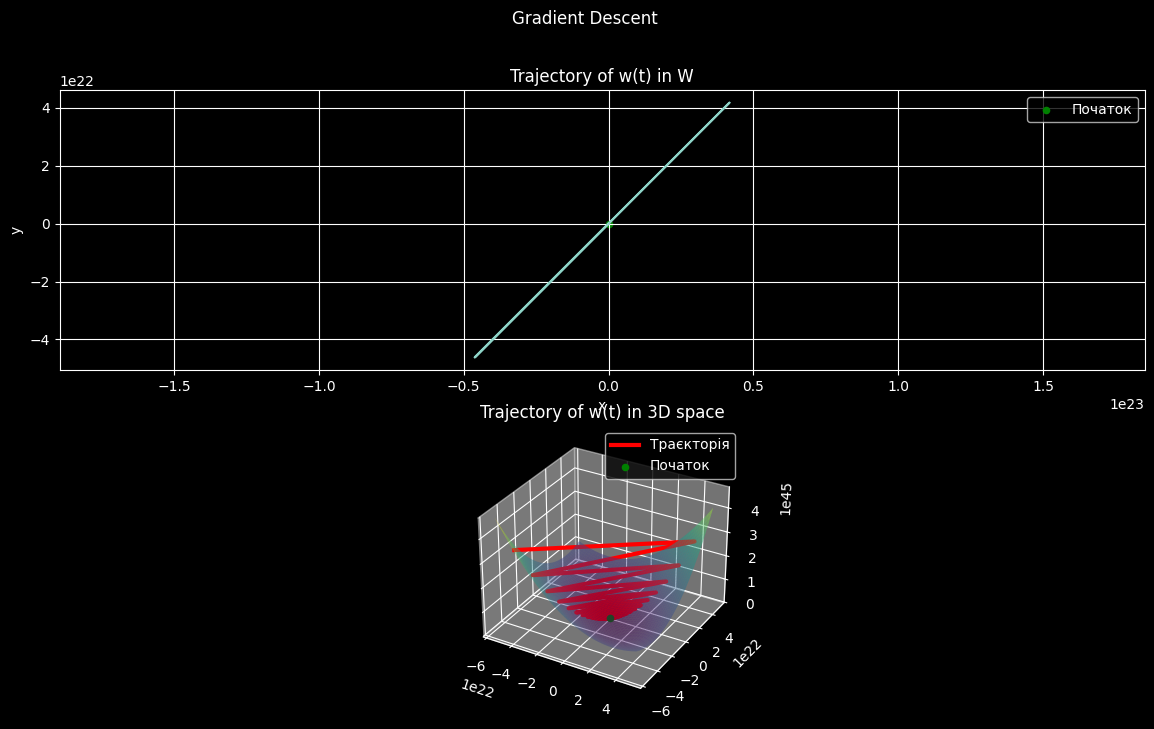

In [160]:
plot_descent(div_desc, E)

При $\eta > 1.25$ алгоритм градієнтного спуску розбігається

Оцінимо швидкість збіжності. Для цього знайдемо частку $\frac{\lambda_{min}}{\lambda_{max}}$, де $\lambda_{max}$ - максимальне власне число матриці $R$, а $\lambda_{min}$ - мінімальне.

In [161]:
print(lambda_min/lambda_max)

0.25000000000000006


Отримали значення ближче до нуля, що означає помірно повільну збіжність алгоритму.